<a href="https://colab.research.google.com/github/andrewwells991/mds_thesis/blob/main/09_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading GeoPandas
%%capture
!pip install geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Data Processing
import pandas as pd
import numpy as np
import geopandas as gpd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon

In [ ]:
#Labeled dataset
df = pd.read_csv('/content/gdrive/MyDrive/mds_thesis/5_labelled_data/proj_all.csv')

<ipython-input-4-626471f6f1d0>:2: DtypeWarning: Columns (8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/mds_thesis/5_labelled_data/proj_all.csv')


In [ ]:
df.columns

Index(['Unnamed: 0', 'B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'row', 'geometry',
       'index_right', 'latitude', 'longitude', 'area_in_meters', 'confidence',
       'full_plus_code', 'building', 'project', 'building_sum', 'urban_rural',
       'proj_name', 'start_date', 'end_dat', 'total_commitment',
       'total_disbursement', 'sectors', 'ieg_outcome', 'place_name'],
      dtype='object')

In [ ]:
#Drop unnecessary variable
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.shape

sum(df['building'])

69258

In [ ]:
df.head()

,B2,B3,B4,B8,B11,B12,row,geometry,index_right,latitude,...,urban_rural,proj_name,start_date,end_dat,total_commitment,total_disbursement,sectors,ieg_outcome,place_name,color
0,1132.0,992.0,1089.0,1861.0,2724.0,2117.0,233,None,1442.0,-14.469378,...,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi,black
1,1374.0,1142.0,1484.0,2075.0,3021.0,2371.0,633,None,5528.0,-14.469538,...,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi,black
2,1190.0,1025.0,1024.0,1607.0,2750.0,2314.0,838,None,4991.0,-14.469668,...,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi,black
3,3441.0,3348.0,5654.0,6622.0,6126.0,6219.0,854,None,804.0,-14.469652,...,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi,black
4,1202.0,1135.0,1176.0,1708.0,2750.0,2314.0,1037,None,5750.0,-14.469738,...,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi,black


In [ ]:
urban_projects = df[df["urban_rural"] == "urban"]["place_name"].unique()
semi_urban_projects = df[df["urban_rural"] == "semi_urban"]["place_name"].unique()
rural_projects = df[df["urban_rural"] == "rural"]["place_name"].unique()

In [ ]:
print("urban projects:", urban_projects)
print("")
print("semi-urban projects:", semi_urban_projects)
print("")
print("rural projects:", rural_projects)

urban projects: ['Mangochi' 'Zomba' 'Limbe' 'Liwonde' 'Blantyre' 'Mchinji' 'Nkhata Bay'
 'Nkhotakota' 'Salima' 'Mzuzu' 'Lilongwe' 'Ntcheu' 'Phalombe' 'Rumphi'
 'Nsanje' 'Chitipa' 'Mwanza']

semi-urban projects: ['Chiradzulu' 'Chamande' "M'Balula" 'Ndalankwanda' 'Nsabwe'
 'Lilongwe District' 'Kazyozyo' 'Dowa District' 'Mulanje District'
 'Cape Maclear' 'Bangula Halt' 'Mulanje' 'Thyolo District']

rural projects: ['Salima District' 'Mlomba' 'Zomba District' 'Blantyre District'
 'Chitipa District' 'Makoko' 'Machinga District' 'Phalombe District'
 'Balaka District']


Visualizing pixels for project site (2021)

['Road Maintenance and Rehabilitation Project']
[237]
['rural']
['Salima District']


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

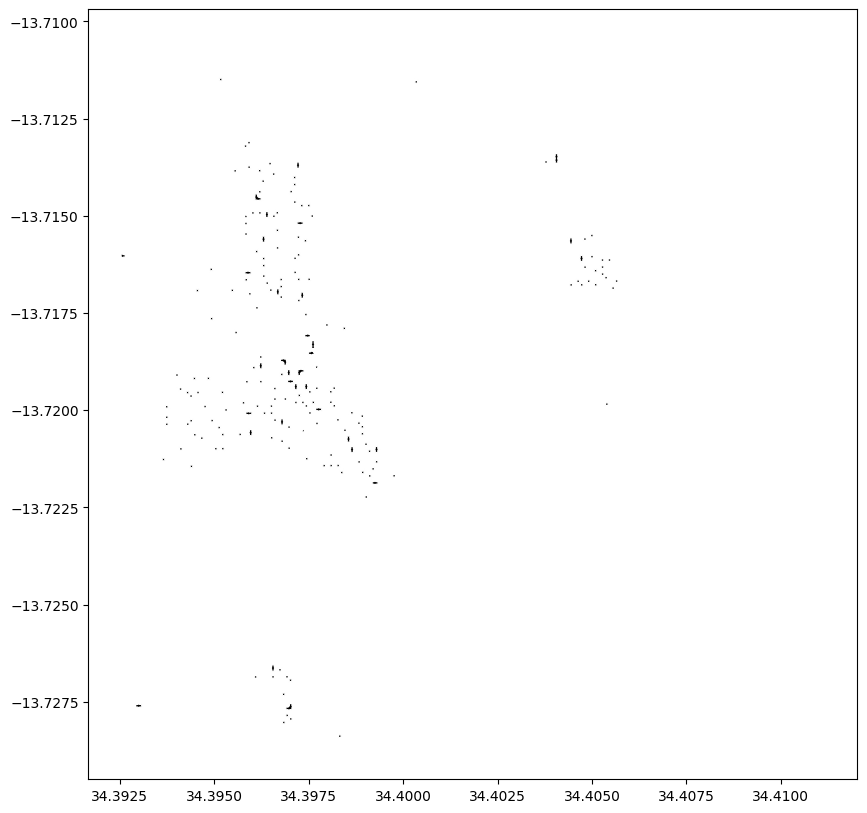

In [ ]:
#Select project and site
proj = df[df['project'] == 'proj_2_6']
#proj = df[(df['place_name'] == 'Mangochi')]

#View number of pixels in ROI classified as building and urban/rural classification
print(proj['proj_name'].values[:1])
print(proj['building_sum'].values[:1])
print(proj['urban_rural'].values[:1])
print(proj['place_name'].values[:1])

#Cleaning data
df_vis = proj.drop(['geometry', 'B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'row', 'index_right', 'area_in_meters', 'confidence', 'full_plus_code', 'project', 'building_sum', 'urban_rural', 'proj_name', 'start_date'], axis=1)

#Making GeoPandas
points = df_vis.apply(lambda row: Point(row.longitude, row.latitude), axis = 1)
gdf = gpd.GeoDataFrame(df, geometry=points)
gdf.crs = {'init': 'epsg:4326'}

# Create a new column to represent color based on Building value
gdf['color'] = ['black' if x == 1 else 'white' for x in gdf['building']]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax = ax, markersize=10, color = gdf['color'])

Examination of number and proportion of building pixels

In [ ]:
#Proportion of pixels which are buildings
sum(df['building'])/(len(df.index))

0.04223280378585739

Text(0, 0.5, 'Proportion')

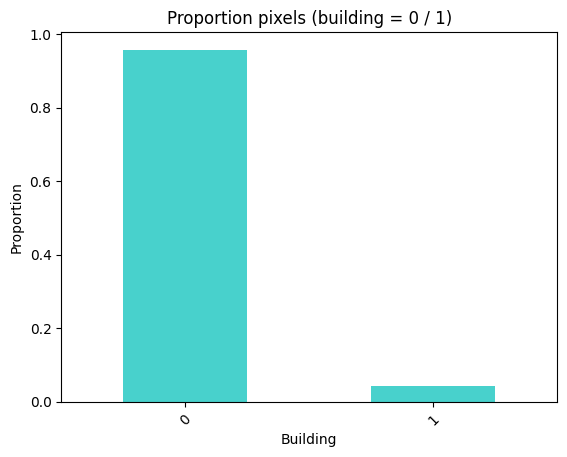

In [ ]:
#Graphical examination of class imbalance
value_counts = df['building'].value_counts(normalize = True)

# plot the result using a bar plot
value_counts.plot(kind='bar', title='Proportion pixels (building = 0 / 1)', color='mediumturquoise')
plt.xlabel('Building')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

[Text(0, 0, 'Rural'), Text(1, 0, 'Semi-Urban'), Text(2, 0, 'Urban')]

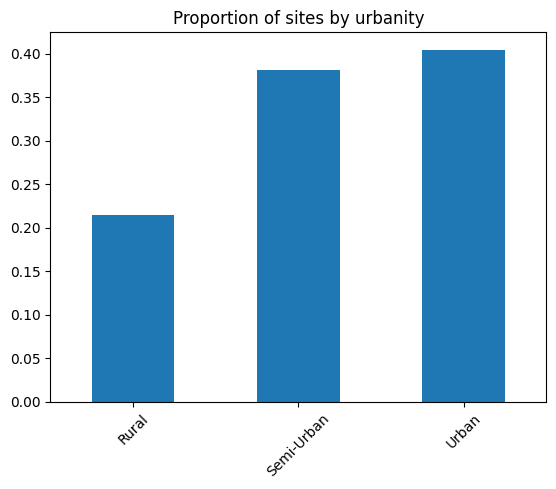

In [ ]:
#Graphical examination of urbanity
value_counts = df['urban_rural'].value_counts(normalize=True)
ordered_value_counts = value_counts.reindex(['rural', 'semi_urban', 'urban'])

# plot the result using a bar plot
ordered_value_counts.plot(kind='bar', title='Proportion of sites by urbanity')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('')

plt.gca().set_xticklabels(['Rural', 'Semi-Urban', 'Urban'])

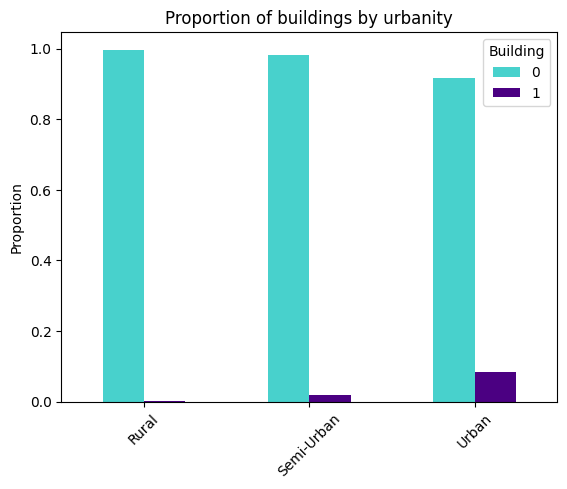

In [ ]:
# group the data by the "project" column and count the number of occurrences of each value in the "building" column for each group
grouped_counts = df.groupby('urban_rural')['building'].value_counts(normalize=True)

# plot the result using a stacked bar plot
grouped_counts.unstack().plot(kind='bar', title='Proportion of buildings by urbanity', color=['mediumturquoise', 'indigo'])
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

plt.gca().set_xticklabels(['Rural', 'Semi-Urban', 'Urban'])
plt.legend(title='Building')

Examining band values for buildings vs. not buildings

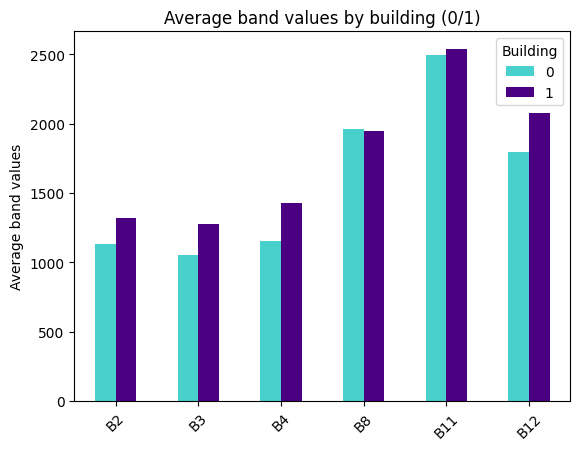

In [ ]:
df_bands = df[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

#Viewing band values grouped by building
df_plt = df_bands.groupby(by=['building']).mean()

df_plt = df_plt.T

# Create a dictionary to map row variable values to colors
colors = {0: 'mediumturquoise', 1: 'indigo'}

# Create a bar plot with colored bars
df_plt.plot(kind='bar', color=[colors[idx] for idx in df_plt.columns])
# Set the title and labels for the plot
plt.title('Average band values by building (0/1)')
plt.ylabel('Average band values')
plt.xticks(rotation=45)
plt.legend(title='Building')
# Show the plot
plt.show()

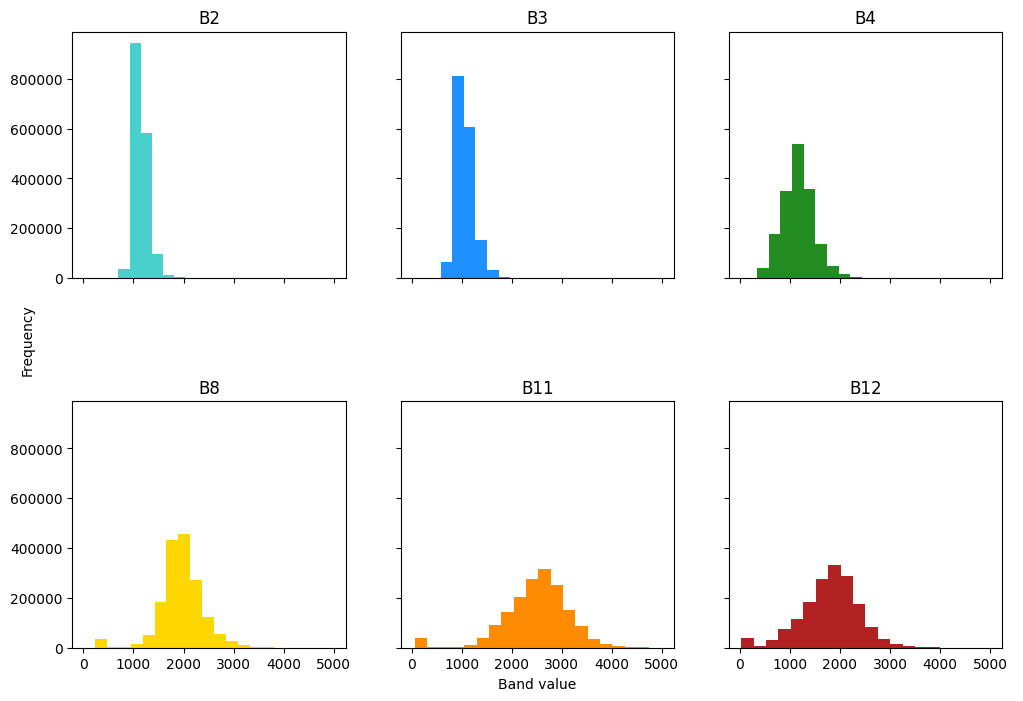

In [ ]:
df_bands = df[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

# Remove values higher than 5000
df_bands = df_bands[df_bands <= 5000]

# Define colors for each band value
colors = ['mediumturquoise', 'dodgerblue', 'forestgreen', 'gold', 'darkorange', 'firebrick']

# Create a figure and axis object for each band value
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the array of axis objects to access each one separately
axs = axs.flatten()

# Create a histogram for each band value
for i, (band, color) in enumerate(zip(df_bands.columns[:-1], colors)):
    axs[i].hist(df_bands[band], bins=20, color=color)
    axs[i].set_title(band, fontsize=12)

# Add a shared x-axis label and y-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Band value')
plt.ylabel('Frequency')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

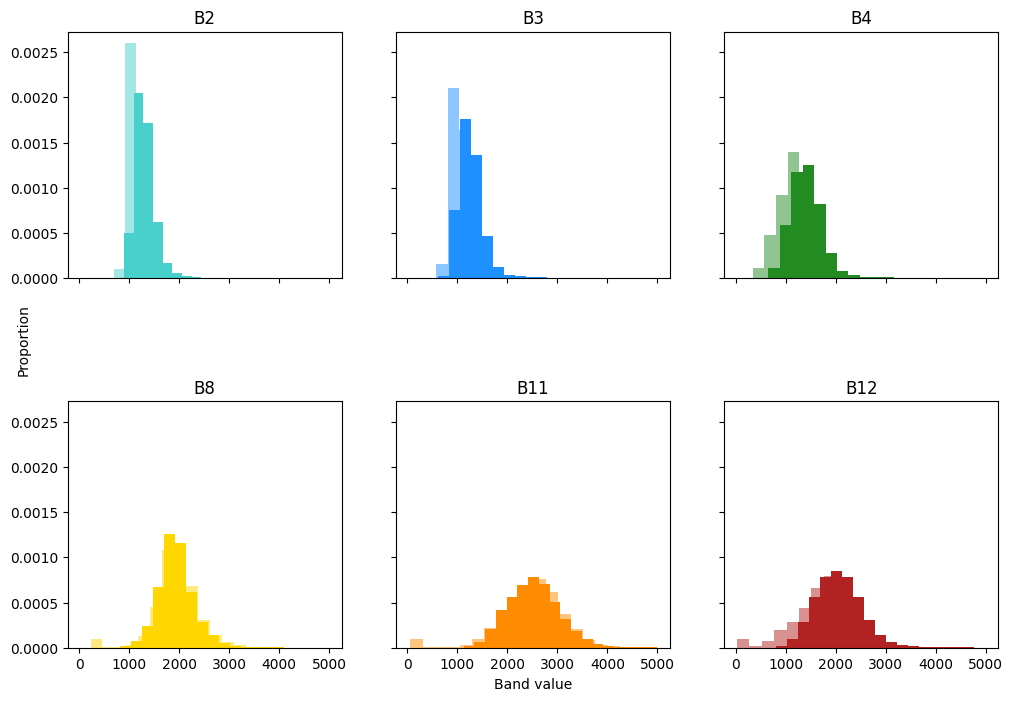

In [ ]:
df_bands = df[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

# Remove values higher than 5000
df_bands = df_bands[df_bands <= 5000]

# Define colors for each band value
colors = {'B2': 'mediumturquoise', 'B3': 'dodgerblue', 'B4': 'forestgreen', 
          'B8': 'gold', 'B11': 'darkorange', 'B12': 'firebrick'}

# Define alpha values for building = 0 and building = 1
alpha_0 = 0.5
alpha_1 = 1.0

# Create a figure and axis object for each band value
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the array of axis objects to access each one separately
axs = axs.flatten()

# Create a histogram for each band value
for i, (band, ax) in enumerate(zip(df_bands.columns[:-1], axs)):
    unique_vals = df_bands['building'].unique()
    if set(unique_vals) != set([0, 1]):
        raise ValueError("Invalid values in 'building' column.")
    for b in [0, 1]:
        data = df_bands[df_bands['building'] == b][band].values
        color = colors[band]
        alpha = alpha_0 if b == 0 else alpha_1
        ax.hist(data, bins=20, color=color, alpha=alpha, density=True)
    ax.set_title(band, fontsize=12)

# Add a shared x-axis label and y-axis label
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Band value')
plt.ylabel('Proportion')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

In [ ]:
df_bands = df[['B2', 'B3', 'B4', 'B8', 'B11', 'B12', 'building']]

#Viewing band values grouped by building
df_plt = df_bands.groupby(by=['building']).mean()

df_plt = df_plt.T

# Calculate standard error values for each bar
se = df_bands.groupby('building').sem().T

# Create a dictionary to map row variable values to colors
colors = {0: 'mediumturquoise', 1: 'indigo'}

# Transpose the dataframe so that bars are horizontal
df_plt = df_plt.T

# Create a horizontal bar plot with colored bars
ax = df_plt.plot(kind='barh', color=[colors[idx] for idx in df_plt.columns])

# Add vertical error bars to the plot
for i, v in enumerate(df_plt.index):
    ax.errorbar(x=df_plt.iloc[i, 0], y=i, xerr=se.iloc[i, 0], fmt='none', ecolor='black', capsize=4, elinewidth=1, markeredgewidth=1)
    ax.errorbar(x=df_plt.iloc[i, 1], y=i, xerr=se.iloc[i, 1], fmt='none', ecolor='black', capsize=4, elinewidth=1, markeredgewidth=1)

# Set the title and labels for the plot
plt.title('Average band values by building (0/1)')
plt.xlabel('Average band values')
plt.ylabel('Building')
plt.legend(title='Building')

# Show the plot
plt.show()

KeyError: ignored

In [ ]:
df_plt

building,0,1
B2,1130.762438,1322.240209
B3,1051.770815,1276.065629
B4,1151.338979,1425.160014
B8,1951.925705,1947.823405
B11,2489.964706,2537.316709
B12,1793.753198,2076.768734


In [ ]:
df

,B2,B3,B4,B8,B11,B12,row,geometry,index_right,latitude,...,building_sum,urban_rural,proj_name,start_date,end_dat,total_commitment,total_disbursement,sectors,ieg_outcome,place_name
0,1132.0,992.0,1089.0,1861.0,2724.0,2117.0,233,POINT (35.25567592795824 -14.4693821969931),1442.0,-14.469378,...,4491,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi
1,1374.0,1142.0,1484.0,2075.0,3021.0,2371.0,633,POINT (35.25549231368975 -14.46956466721218),5528.0,-14.469538,...,4491,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi
2,1190.0,1025.0,1024.0,1607.0,2750.0,2314.0,838,POINT (35.25595682475707 -14.469650567064631),4991.0,-14.469668,...,4491,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi
3,3441.0,3348.0,5654.0,6622.0,6126.0,6219.0,854,POINT (35.25744033914911 -14.469636333394764),804.0,-14.469652,...,4491,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi
4,1202.0,1135.0,1176.0,1708.0,2750.0,2314.0,1037,POINT (35.25586501769815 -14.469741802294187),5750.0,-14.469738,...,4491,urban,Road Maintenance and Rehabilitation Project,1999-06-10,2006-06-30,39500000,41032113.0,Roads and highways; Central Government (Centra...,Moderately satisfactory,Mangochi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673529,922.0,815.0,764.0,1724.0,2319.0,1521.0,39858,NaN,NaN,-15.057380,...,82,rural,Community Based Rural Land Development Project,2009-11-19,2013-01-31,10349647,NaN,"Public Administration - Agriculture, Fishing &...",Satisfactory,Balaka District
1673530,950.0,844.0,810.0,1627.0,2319.0,1521.0,39859,NaN,NaN,-15.057379,...,82,rural,Community Based Rural Land Development Project,2009-11-19,2013-01-31,10349647,NaN,"Public Administration - Agriculture, Fishing &...",Satisfactory,Balaka District
1673531,979.0,868.0,874.0,1660.0,2194.0,1359.0,39860,NaN,NaN,-15.057378,...,82,rural,Community Based Rural Land Development Project,2009-11-19,2013-01-31,10349647,NaN,"Public Administration - Agriculture, Fishing &...",Satisfactory,Balaka District
1673532,935.0,817.0,780.0,1816.0,2194.0,1359.0,39861,NaN,NaN,-15.057377,...,82,rural,Community Based Rural Land Development Project,2009-11-19,2013-01-31,10349647,NaN,"Public Administration - Agriculture, Fishing &...",Satisfactory,Balaka District


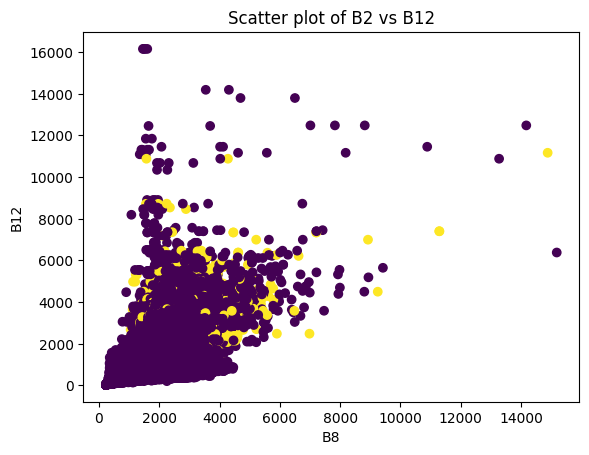

In [ ]:
# Create a scatter plot
plt.scatter(df['B8'], df['B12'], c=df['building'])

# Add labels and title
plt.xlabel('B8')
plt.ylabel('B12')
plt.title('Scatter plot of B2 vs B12')

# Show the plot
plt.show()

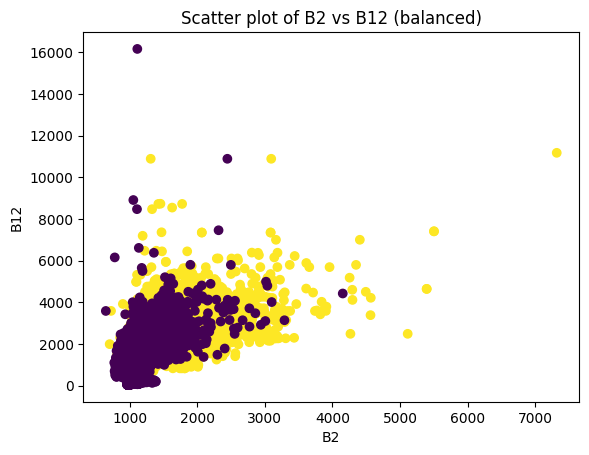

In [ ]:
grouped = df.groupby('building')

# Sample the 'building=0' group to include only as many observations as there are in the 'building=1' group
sampled = grouped.get_group(0).sample(n=grouped.get_group(1).shape[0], random_state=42)

# Combine the two groups back into a single dataset
balanced_df = pd.concat([grouped.get_group(1), sampled])

# Create a scatter plot with the balanced dataset
plt.scatter(balanced_df['B2'], balanced_df['B12'], c=balanced_df['building'])

# Add labels and title
plt.xlabel('B8')
plt.ylabel('B12')
plt.title('Scatter plot of B2 vs B12 (balanced)')

# Show the plot
plt.show()